<a href="https://colab.research.google.com/github/Sandi-DeLaVega/Tensorflow-Practice/blob/main/Natural_Language_Processing_with_RNNs_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Natural Language Processing

### Natural Language Processing (or NLP for short) is a discipline in computing that deals with the communication between natural (human) languages and computer languages. 

Example of NLP:

*   Spellcheck
*   Autocomplete

### Essentially NLP is the field that focuses on how computers can understand and/or process natural/human languages.

#Recurrent Neural Networks

how to use a reccurent neural network to do the following:
* Sentiment Analysis
* Character Generation




#Sequence Data

Need to Track of where each of the words appear and use that information to try to understand the meaning of pieces of text

#Encoding Text

##Bag of Words

* First and simplest way to encode our data. <br>
* Each word in a sentence is encoded with an integer and thrown into a collection that does not maintain the order of the words but does keep track of the frequency

In [1]:
vocab = {}  # maps word to integer representing it
word_encoding = 1
def bag_of_words(text):
  global word_encoding

  words = text.lower().split(" ")  # create a list of all of the words in the text, well assume there is no grammar in our text for this example
  bag = {}  # stores all of the encodings and their frequency

  for word in words:
    if word in vocab:
      encoding = vocab[word]  # get encoding from vocab
    else:
      vocab[word] = word_encoding
      encoding = word_encoding
      word_encoding += 1
    
    if encoding in bag:
      bag[encoding] += 1
    else:
      bag[encoding] = 1
  
  return bag

text = "this is a test to see if this test will work is is test a a"
bag = bag_of_words(text)
print(bag)
print(vocab)

{1: 2, 2: 3, 3: 3, 4: 3, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1}
{'this': 1, 'is': 2, 'a': 3, 'test': 4, 'to': 5, 'see': 6, 'if': 7, 'will': 8, 'work': 9}


Example of Bag of Words Encoding

In [2]:
positive_review = "I thought the movie was going to be bad but it was actually amazing"
negative_review = "I thought the movie was going to be amazing but it was actually bad"

pos_bag = bag_of_words(positive_review)
neg_bag = bag_of_words(negative_review)

print("Positive:", pos_bag)
print("Negative:", neg_bag)

Positive: {10: 1, 11: 1, 12: 1, 13: 1, 14: 2, 15: 1, 5: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1}
Negative: {10: 1, 11: 1, 12: 1, 13: 1, 14: 2, 15: 1, 5: 1, 16: 1, 21: 1, 18: 1, 19: 1, 20: 1, 17: 1}


#Integer Encoding
 representing each word or character in a sentence as a unique integer and maintaining the order of these words

In [3]:
vocab = {}  
word_encoding = 1
def one_hot_encoding(text):
  global word_encoding

  words = text.lower().split(" ") 
  encoding = []  

  for word in words:
    if word in vocab:
      code = vocab[word]  
      encoding.append(code) 
    else:
      vocab[word] = word_encoding
      encoding.append(word_encoding)
      word_encoding += 1
  
  return encoding

text = "this is a test to see if this test will work is is test a a"
encoding = one_hot_encoding(text)
print(encoding)
print(vocab)

[1, 2, 3, 4, 5, 6, 7, 1, 4, 8, 9, 2, 2, 4, 3, 3]
{'this': 1, 'is': 2, 'a': 3, 'test': 4, 'to': 5, 'see': 6, 'if': 7, 'will': 8, 'work': 9}


In [4]:
positive_review = "I thought the movie was going to be bad but it was actually amazing"
negative_review = "I thought the movie was going to be amazing but it was actually bad"

pos_encode = one_hot_encoding(positive_review)
neg_encode = one_hot_encoding(negative_review)

print("Positive:", pos_encode)
print("Negative:", neg_encode)

Positive: [10, 11, 12, 13, 14, 15, 5, 16, 17, 18, 19, 14, 20, 21]
Negative: [10, 11, 12, 13, 14, 15, 5, 16, 21, 18, 19, 14, 20, 17]


#Word Embeddings

* keeps the order of words intact as well as encodes similar words with very similar labels. 
* encode the frequency and order of words but the meaning of those words in the sentence. 
* encodes each word as a dense vector that represents its context in the sentence.
* add embedding layer to the beggining of your model and while your model trains your embedding layer will learn the correct embeddings for words

# Recurrent Neural Networks (RNN's)

* will process one word at a time while maintaining an internal memory of what it's already seen
* allow it to treat words differently based on their order in a sentence and to slowly build an understanding of the entire input, one word at a time

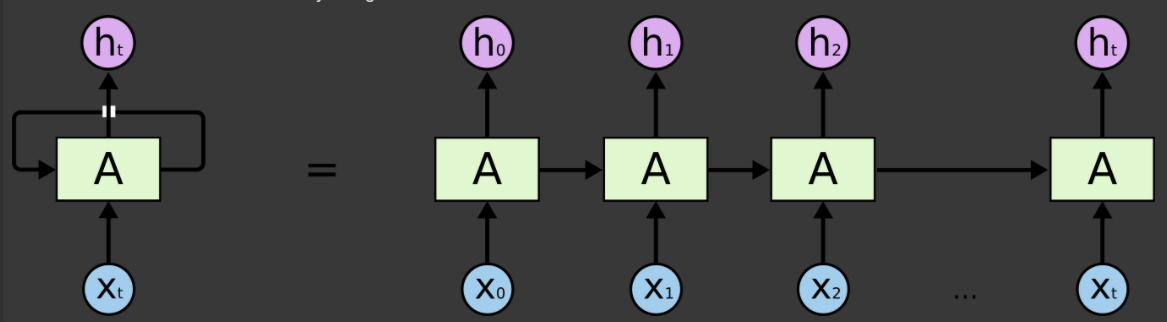

Let the ff be:
* ht output at time t
* xt input at time t
* A Recurrent Layer (loop)






#LSTM

##Long Short-Term Memory
* works very similarily to the simpleRNN layer but adds a way to access inputs from any timestep in the past
* have a long-term memory data structure storing all the previously seen inputs as well as when we saw them
* allows for us to access any previous value we want at any point in time
* adds to the complexity of our network and allows it to discover more useful relationships between inputs and when they appear

#Sentiment Analysis

From Wikipedia:
* the process of computationally identifying and categorizing opinions expressed in a piece of text, especially in order to determine whether the writer's attitude towards a particular topic, product, etc. is positive, negative, or neutral.

#Movie Review Dataset

This dataset contains 25,000 reviews from IMDB where each one is already preprocessed and has a label as either positive or negative.
Each review is encoded by integers that represents how common a word is in the entire dataset.


In [5]:
%tensorflow_version 2.x 
from keras.datasets import imdb
from keras.preprocessing import sequence
import keras
import tensorflow as tf
import os
import numpy as np

VOCAB_SIZE = 88584

MAXLEN = 250
BATCH_SIZE = 64

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = VOCAB_SIZE)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [6]:
#Looking at one review
train_data[1]

[1,
 194,
 1153,
 194,
 8255,
 78,
 228,
 5,
 6,
 1463,
 4369,
 5012,
 134,
 26,
 4,
 715,
 8,
 118,
 1634,
 14,
 394,
 20,
 13,
 119,
 954,
 189,
 102,
 5,
 207,
 110,
 3103,
 21,
 14,
 69,
 188,
 8,
 30,
 23,
 7,
 4,
 249,
 126,
 93,
 4,
 114,
 9,
 2300,
 1523,
 5,
 647,
 4,
 116,
 9,
 35,
 8163,
 4,
 229,
 9,
 340,
 1322,
 4,
 118,
 9,
 4,
 130,
 4901,
 19,
 4,
 1002,
 5,
 89,
 29,
 952,
 46,
 37,
 4,
 455,
 9,
 45,
 43,
 38,
 1543,
 1905,
 398,
 4,
 1649,
 26,
 6853,
 5,
 163,
 11,
 3215,
 10156,
 4,
 1153,
 9,
 194,
 775,
 7,
 8255,
 11596,
 349,
 2637,
 148,
 605,
 15358,
 8003,
 15,
 123,
 125,
 68,
 23141,
 6853,
 15,
 349,
 165,
 4362,
 98,
 5,
 4,
 228,
 9,
 43,
 36893,
 1157,
 15,
 299,
 120,
 5,
 120,
 174,
 11,
 220,
 175,
 136,
 50,
 9,
 4373,
 228,
 8255,
 5,
 25249,
 656,
 245,
 2350,
 5,
 4,
 9837,
 131,
 152,
 491,
 18,
 46151,
 32,
 7464,
 1212,
 14,
 9,
 6,
 371,
 78,
 22,
 625,
 64,
 1382,
 9,
 8,
 168,
 145,
 23,
 4,
 1690,
 15,
 16,
 4,
 1355,
 5,
 28,
 6,
 52,
 

###More Preprocessing
* Some reviews are of different lengths.
* Cannot pass Different Length data into Neural Network

### Make Each Review of the Same Length
#Procedure:
* If the review is > 250 words, trim off the extra words
* If review < 250 words, add necessary 0's to make it equal to 250

In [7]:
train_data = sequence.pad_sequences(train_data, MAXLEN)
test_data = sequence.pad_sequences(test_data, MAXLEN)

#Creating the Model

use a word embedding layer as the first layer in our model and add a LSTM layer afterwards that feeds into a dense node to get our predicted sentiment

32 stands for the output dimension of the vectors generated by the embedding layer

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, 32),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          2834688   
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 2,843,041
Trainable params: 2,843,041
Non-trainable params: 0
_________________________________________________________________


#Training

In [10]:
model.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=['acc'])

history = model.fit(train_data, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 68s 106ms/step - loss: 0.5327 - acc: 0.7206 - val_loss: 0.3705 - val_acc: 0.8676
Epoch 2/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2431 - acc: 0.9054 - val_loss: 0.3122 - val_acc: 0.8660
Epoch 3/10
625/625 [==============================] - 66s 105ms/step - loss: 0.1732 - acc: 0.9380 - val_loss: 0.2719 - val_acc: 0.8818
Epoch 4/10
625/625 [==============================] - 65s 104ms/step - loss: 0.1384 - acc: 0.9481 - val_loss: 0.3132 - val_acc: 0.8698
Epoch 5/10
625/625 [==============================] - 65s 104ms/step - loss: 0.1200 - acc: 0.9590 - val_loss: 0.4394 - val_acc: 0.8726
Epoch 6/10
625/625 [==============================] - 66s 106ms/step - loss: 0.1068 - acc: 0.9634 - val_loss: 0.3189 - val_acc: 0.8810
Epoch 7/10
625/625 [==============================] - 66s 105ms/step - loss: 0.0941 - acc: 0.9684 - val_loss: 0.3925 - val_acc: 0.8676
Epoch 8/10
625/625 [==============================] - 6

In [11]:
results = model.evaluate(test_data, test_labels)
print(results)

782/782 [==============================] - 18s 23ms/step - loss: 0.4304 - acc: 0.8557
[0.4304167628288269, 0.855679988861084]


# Making Predictions
Since our reviews are encoded well need to convert any review that we write into that form so the network can understand it. To do that well load the encodings from the dataset and use them to encode our own data.

In [12]:
word_index = imdb.get_word_index()

def encode_text(text):
  tokens = keras.preprocessing.text.text_to_word_sequence(text)
  tokens = [word_index[word] if word in word_index else 0 for word in tokens]
  return sequence.pad_sequences([tokens], MAXLEN)[0]

text = "that movie was just amazing, so amazing"
encoded = encode_text(text)
print(encoded)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  12  17  13  4

In [13]:
#make a decode function
reverse_word_index = {value: key for (key, value) in word_index.items()}

def decode_integers(integers):
  PAD = 0
  text = ""
  for num in integers:
    if num != PAD:
      text += reverse_word_index[num] + " "

  return text[:-1]

print(decode_integers(encoded))

that movie was just amazing so amazing


In [14]:
# now time to make a prediction

def predict(text):
  encoded_text = encode_text(text)
  pred = np.zeros((1,250))
  pred[0] = encoded_text
  result = model.predict(pred) 
  print(result[0])

positive_review = "That movie was! really loved it and would great watch it again because it was amazingly great"
predict(positive_review)

negative_review = "that movie really sucked. I hated it and wouldn't watch it again. Was one of the worst things I've ever watched"
predict(negative_review)


[0.93383634]
[0.2836957]


#RNN Play Generator
* use a RNN to generate a play


In [15]:
from keras.preprocessing import sequence
import keras
import tensorflow as tf
import os
import numpy as np


#Data Set From ShakeSpear Play

In [16]:
path_to_file = tf.keras.utils.get_file('shakespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')

#Loading Your Own Data

In [17]:
#from google.colab import files
#path_to_file = list(files.upload().keys())[0]

IndexError: ignored

#Read Contents of File

In [18]:
# Read, then decode for py2 compat.
text = open(path_to_file, 'rb').read().decode(encoding='utf-8')
# length of text is the number of characters in it
print ('Length of text: {} characters'.format(len(text)))

Length of text: 1115394 characters


In [19]:
# Take a look at the first 250 characters in text
print(text[:250])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.



#Encoding

In [21]:
vocab = sorted(set(text))
# Creating a mapping from unique characters to indices
char2idx = {u:i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)

def text_to_int(text):
  return np.array([char2idx[c] for c in text])

text_as_int = text_to_int(text)

In [22]:
seq_length = 100  # length of sequence for a training example
examples_per_epoch = len(text)//(seq_length+1)

# Create training examples / targets
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

In [23]:
# lets look at how part of our text is encoded
print("Text:", text[:13])
print("Encoded:", text_to_int(text[:13]))

Text: First Citizen
Encoded: [18 47 56 57 58  1 15 47 58 47 64 43 52]


In [24]:
def int_to_text(ints):
  try:
    ints = ints.numpy()
  except:
    pass
  return ''.join(idx2char[ints])

print(int_to_text(text_as_int[:13]))

First Citizen


#Creating Training Examples
use a seq_length sequence as input and a seq_length sequence as the output where that sequence is the original sequence shifted one letter to the right

In [25]:
seq_length = 100  # length of sequence for a training example
examples_per_epoch = len(text)//(seq_length+1)

# Create training examples / targets
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

use the batch method to turn this stream of characters into batches of desired length

In [26]:
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)

use these sequences of length 101 and split them into input and output

In [27]:
def split_input_target(chunk):  # for the example: hello
    input_text = chunk[:-1]  # hell
    target_text = chunk[1:]  # ello
    return input_text, target_text  # hell, ello

dataset = sequences.map(split_input_target)  # we use map to apply the above function to every entry

In [28]:
for x, y in dataset.take(2):
  print("\n\nEXAMPLE\n")
  print("INPUT")
  print(int_to_text(x))
  print("\nOUTPUT")
  print(int_to_text(y))



EXAMPLE

INPUT
First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You

OUTPUT
irst Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You 


EXAMPLE

INPUT
are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you 

OUTPUT
re all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you k


 make training batches.

In [29]:
BATCH_SIZE = 32 #reducing batch size from 64
VOCAB_SIZE = len(vocab)  # vocab is number of unique characters
EMBEDDING_DIM = 256
RNN_UNITS = 1024

# Buffer size to shuffle the dataset
# (TF data is designed to work with possibly infinite sequences,
# so it doesn't attempt to shuffle the entire sequence in memory. Instead,
# it maintains a buffer in which it shuffles elements).
BUFFER_SIZE = 10000

data = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

#Building the Model

In [30]:
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
  model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                              batch_input_shape=[batch_size, None]),
    tf.keras.layers.LSTM(rnn_units,
                        return_sequences=True,
                        stateful=True,
                        recurrent_initializer='glorot_uniform'),
    tf.keras.layers.Dense(vocab_size)
  ])
  return model

model = build_model(VOCAB_SIZE,EMBEDDING_DIM, RNN_UNITS, BATCH_SIZE)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (32, None, 256)           16640     
_________________________________________________________________
lstm_1 (LSTM)                (32, None, 1024)          5246976   
_________________________________________________________________
dense_1 (Dense)              (32, None, 65)            66625     
Total params: 5,330,241
Trainable params: 5,330,241
Non-trainable params: 0
_________________________________________________________________


#Creating a Loss Function

create our own loss function for this problem

Model will output a (64, sequence_length, 65) shaped tensor that represents the probability distribution of each character at each timestep for every sequence in the batch

In [31]:
for input_example_batch, target_example_batch in data.take(1):
  example_batch_predictions = model(input_example_batch)  # ask our model for a prediction on our first batch of training data (64 entries)
  print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")  # print out the output shape

(32, 100, 65) # (batch_size, sequence_length, vocab_size)


In [32]:
# we can see that the predicition is an array of 64 arrays, one for each entry in the batch
print(len(example_batch_predictions))
print(example_batch_predictions)

32
tf.Tensor(
[[[ 8.63949535e-04  1.24557863e-03  3.64687480e-03 ...  1.42847397e-03
   -4.82911058e-03 -3.79413925e-03]
  [ 7.14002643e-03  8.05884134e-04 -1.64137722e-03 ...  5.11776656e-03
   -1.36730832e-03 -2.31924397e-03]
  [ 1.85153761e-03 -6.21755933e-03  7.36283138e-04 ...  5.60166140e-04
    2.58810772e-03 -2.09979154e-03]
  ...
  [-1.17475875e-02 -4.98123560e-03 -3.75442300e-03 ... -1.12078674e-02
    5.26962336e-03 -1.64910732e-03]
  [-7.89217302e-05 -4.88245580e-03 -2.45795911e-03 ... -1.19129661e-02
    9.79095348e-04 -3.95677192e-03]
  [-9.44514573e-03 -6.26624702e-03  9.63259139e-04 ... -1.37733929e-02
    1.01164775e-03 -6.89506857e-03]]

 [[ 3.20827821e-03  6.66984078e-03  2.84081325e-03 ...  9.36908368e-03
    5.74760232e-03  5.16699161e-03]
  [ 2.81640701e-03  3.01279174e-03  5.17643569e-03 ...  5.84427174e-03
    7.05003366e-03  5.15001360e-03]
  [ 1.16595230e-03  6.14716066e-03  3.66734853e-03 ...  3.19598499e-03
    5.47683612e-03  6.95656799e-03]
  ...
  [-1.120

In [33]:
# lets examine one prediction
pred = example_batch_predictions[0]
print(len(pred))
print(pred)
# notice this is a 2d array of length 100, where each interior array is the prediction for the next character at each time step

100
tf.Tensor(
[[ 8.63949535e-04  1.24557863e-03  3.64687480e-03 ...  1.42847397e-03
  -4.82911058e-03 -3.79413925e-03]
 [ 7.14002643e-03  8.05884134e-04 -1.64137722e-03 ...  5.11776656e-03
  -1.36730832e-03 -2.31924397e-03]
 [ 1.85153761e-03 -6.21755933e-03  7.36283138e-04 ...  5.60166140e-04
   2.58810772e-03 -2.09979154e-03]
 ...
 [-1.17475875e-02 -4.98123560e-03 -3.75442300e-03 ... -1.12078674e-02
   5.26962336e-03 -1.64910732e-03]
 [-7.89217302e-05 -4.88245580e-03 -2.45795911e-03 ... -1.19129661e-02
   9.79095348e-04 -3.95677192e-03]
 [-9.44514573e-03 -6.26624702e-03  9.63259139e-04 ... -1.37733929e-02
   1.01164775e-03 -6.89506857e-03]], shape=(100, 65), dtype=float32)


In [34]:
# and finally well look at a prediction at the first timestep
time_pred = pred[0]
print(len(time_pred))
print(time_pred)
# and of course its 65 values representing the probabillity of each character occuring next

65
tf.Tensor(
[ 0.00086395  0.00124558  0.00364687 -0.00044252 -0.00222366  0.00107428
 -0.00436936  0.00349897 -0.00106652  0.00360878 -0.00282236 -0.00012254
 -0.00625784  0.0047593  -0.00033868 -0.00245516 -0.00184442  0.00010053
 -0.00266794  0.0006233   0.00122459 -0.00252377 -0.00010827  0.00617811
 -0.00048699 -0.00268287 -0.00332178  0.00416952 -0.00120097  0.00648476
  0.00284751 -0.00326608  0.00113281  0.00370091  0.00338635  0.00068918
  0.00412584  0.00086616  0.00012947 -0.00143553 -0.00260279  0.00065536
 -0.00134113 -0.00550483  0.00566489 -0.00165402  0.00449615 -0.00167935
 -0.00195123 -0.00339715 -0.00578174  0.00252044  0.00162923 -0.00352296
  0.00205325 -0.00332469  0.00372901 -0.00348514  0.00161241  0.00141889
 -0.00604965  0.00010471  0.00142847 -0.00482911 -0.00379414], shape=(65,), dtype=float32)


In [35]:
# If we want to determine the predicted character we need to sample the output distribution (pick a value based on probabillity)
sampled_indices = tf.random.categorical(pred, num_samples=1)

# now we can reshape that array and convert all the integers to numbers to see the actual characters
sampled_indices = np.reshape(sampled_indices, (1, -1))[0]
predicted_chars = int_to_text(sampled_indices)

predicted_chars  # and this is what the model predicted for training sequence 1

"&iDu,SzKVqCWOAbODfnASCq?kye'kuxtCOkz3LJdhE?JS'oBIEIn.XP.a. VSePYTW'SwghCD3PKtPH3A$L JIHwO,sKiIr-xvRW"

create a loss function that can compare that output to the expected output and give us some numeric value representing how close the two were.

In [36]:
def loss(labels, logits):
  return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)

#Compiling the Model

think of our problem as a classification problem where the model predicts the probabillity of each unique letter coming next.

In [37]:
model.compile(optimizer='adam', loss=loss)

#Creating Checkpoints
setup and configure our model to save checkpoinst as it trains. This will allow us to load our model from a checkpoint and continue training it.

In [38]:
# Directory where the checkpoints will be saved
checkpoint_dir = './training_checkpoints'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

#Training
If this is taking a while go to Runtime > Change Runtime Type and choose "GPU" under hardware accelerator.

In [39]:
history = model.fit(data, epochs=5, callbacks=[checkpoint_callback])

Epoch 1/5
345/345 [==============================] - 2037s 6s/step - loss: 2.7667
Epoch 2/5
345/345 [==============================] - 2030s 6s/step - loss: 1.7349
Epoch 3/5
345/345 [==============================] - 2031s 6s/step - loss: 1.4965
Epoch 4/5
345/345 [==============================] - 2023s 6s/step - loss: 1.3919
Epoch 5/5
345/345 [==============================] - 2041s 6s/step - loss: 1.3229


#Loading the Model
rebuild the model from a checkpoint using a batch_size of 1 so that we can feed one peice of text to the model and have it make a prediction.

In [40]:
model = build_model(VOCAB_SIZE, EMBEDDING_DIM, RNN_UNITS, batch_size=1)

Once the model is finished training, we can find the lastest checkpoint that stores the models weights using the following line.

In [41]:
model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
model.build(tf.TensorShape([1, None]))

 load any checkpoint we want by specifying the exact file to load.

In [47]:
#checkpoint_num = 5
##model.load_weights(tf.train.load_checkpoint("./training_checkpoints/ckpt_" + str(checkpoint_num)))
#model.build(tf.TensorShape([1, None]))

Generating Text
Now we can use the lovely function provided by tensorflow to generate some text using any starting string we'd like.

In [45]:
def generate_text(model, start_string):
  # Evaluation step (generating text using the learned model)

  # Number of characters to generate
  num_generate = 800

  # Converting our start string to numbers (vectorizing)
  input_eval = [char2idx[s] for s in start_string]
  input_eval = tf.expand_dims(input_eval, 0)

  # Empty string to store our results
  text_generated = []

  # Low temperatures results in more predictable text.
  # Higher temperatures results in more surprising text.
  # Experiment to find the best setting.
  temperature = 1.0

  # Here batch size == 1
  model.reset_states()
  for i in range(num_generate):
      predictions = model(input_eval)
      # remove the batch dimension
    
      predictions = tf.squeeze(predictions, 0)

      # using a categorical distribution to predict the character returned by the model
      predictions = predictions / temperature
      predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()

      # We pass the predicted character as the next input to the model
      # along with the previous hidden state
      input_eval = tf.expand_dims([predicted_id], 0)

      text_generated.append(idx2char[predicted_id])

  return (start_string + ''.join(text_generated))

In [46]:
inp = input("Type a starting string: ")
print(generate_text(model, inp))

Type a starting string: Hello I like the moview
Hello I like the moview
Deer, hownd-acherity, and aback,
And be the hain to day my heart,
And never no more immort: the want Warwick's them; and
haip, the aptredly provided promuserous writk?
What doing-being heard must curse again.

Cloruwellower, if I stooply,
So deep the firm,
And not the day be way, it is aboattent spear,
Clordon's will, not think it will, let me
there is your howard? thou art infect me,
Lean with the child I live: or murdels and good-doom.
Thy hand madeolable what armects heary
With this dead merit, if before alike.

LORD FITZUTHEM:
Right never think the eyes degree of the false;
Siff he the other scovery walk.
I kase
Father than he did:
The gear is so carrain'd, when he hath proferse of notage,
And tobxens with ban a had, and as bale,
Show'd from brook--whom nothing good Behnuch England's 


#Source:
TensorFlow 2.0 Complete Course - Python Neural Networks for Beginners Tutorial
https://colab.research.google.com/drive/1ysEKrw_LE2jMndo1snrZUh5w87LQsCxk#forceEdit=true&sandboxMode=true